In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# Building URL
# Using this test city to see how the Json Response looks. 

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
test_city = 'hilo'
tester = requests.get(f"{url}&q={test_city}").json()
tester

{'coord': {'lon': -155.08, 'lat': 19.71},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 71.56,
  'pressure': 1017,
  'humidity': 83,
  'temp_min': 69.01,
  'temp_max': 77},
 'visibility': 16093,
 'wind': {'speed': 7.96, 'deg': 83.251},
 'rain': {'1h': 0.51},
 'clouds': {'all': 90},
 'dt': 1569322156,
 'sys': {'type': 1,
  'id': 7881,
  'message': 0.0084,
  'country': 'US',
  'sunrise': 1569341373,
  'sunset': 1569384908},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

In [4]:
# Lists that will become the colums of the required data frame. 
city_name = [] 
cloudiness = []
Country = [] 
Date = [] 
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# Getting weather data Method adopted from methods found in Ins_OpenWeatherRequests and Stu_Burundi activites.
#---------------------------------------------------------------------------------------------


for city in cities: 
    try:
        weather_response = requests.get(f"{url}&q={city}").json()

    #geting city name fom JSON response 
        city = weather_response['name']
        city_name.append(city)
    
    #geting cloudiness data
        clouds = weather_response['clouds']['all']
        cloudiness.append(clouds)
    
    #getting coutry data
        coun = weather_response['sys']['country']
        Country.append(coun)
    
    #getting data 
        time = weather_response['dt']
        Date.append(time)
    
    #getting humidity data
        humid = weather_response['main']['humidity']
        Humidity.append(humid)
    
    #getting Lats
        La = weather_response['coord']['lat']
        Lat.append(La)
    
    #getting Longs
        Lo = weather_response['coord']['lon']
        Lng.append(Lo)
    
    #getting Max_temp
        Max = weather_response['main']['temp_max']
        Max_Temp.append(Max)
    
    #Getting Wind Speed
        Wind = weather_response['wind']['speed']
        Wind_Speed.append(Wind)
        
        print(f"Processing Record for {city}")
    
    except:
        print("this city not found")

Processing Record for Mokolo
Processing Record for Taoudenni
Processing Record for Albany
this city not found
Processing Record for Rikitea
Processing Record for Georgetown
Processing Record for Ahipara
Processing Record for Amapa
Processing Record for Ushuaia
Processing Record for Vaini
this city not found
Processing Record for Lumphat
Processing Record for Saint-Georges
Processing Record for Los Llanos de Aridane
Processing Record for Ambunti
Processing Record for Bluff
Processing Record for Haines Junction
Processing Record for Aswan
Processing Record for Torbay
Processing Record for Provideniya
Processing Record for Port Alfred
Processing Record for Avarua
Processing Record for Tuktoyaktuk
Processing Record for Sao Joao da Barra
Processing Record for Carnarvon
Processing Record for Husavik
Processing Record for Nikolskoye
Processing Record for Busselton
Processing Record for Butaritari
Processing Record for Cabo San Lucas
Processing Record for Codrington
Processing Record for Kyzyl

Processing Record for Saint-Joseph
Processing Record for Komsomolskiy
Processing Record for Palauig
Processing Record for Asyut
Processing Record for Kavaratti
Processing Record for Isangel
Processing Record for Durango
Processing Record for Lebu
Processing Record for Vestmannaeyjar
Processing Record for Ajdabiya
Processing Record for Morro Bay
Processing Record for General Roca
Processing Record for Mango
Processing Record for Trebinje
this city not found
Processing Record for San Patricio
Processing Record for Shu
Processing Record for Ilulissat
Processing Record for Udachnyy
Processing Record for Assiniboia
Processing Record for Katastarion
this city not found
Processing Record for Lengshuijiang
Processing Record for Emerald
Processing Record for Mabaruma
Processing Record for Fuzhou
Processing Record for Talnakh
Processing Record for Victoria
Processing Record for Chulumani
Processing Record for Churapcha
Processing Record for Beziers
Processing Record for Russell
Processing Record

Processing Record for Gazojak
Processing Record for Homberg
Processing Record for Winona
Processing Record for Nanortalik
Processing Record for Tucuman
Processing Record for Balaguer
this city not found
Processing Record for Plainview
Processing Record for Pueblo Bello
Processing Record for Coihaique
Processing Record for Mogapi
Processing Record for Tual
Processing Record for Tuburan
Processing Record for Port-Cartier
Processing Record for Lakhdenpokhya
Processing Record for Lunel
Processing Record for Klyuchi
Processing Record for Megion
Processing Record for Launceston
Processing Record for Clarksburg
Processing Record for Boende
Processing Record for Pinerolo
this city not found
Processing Record for İzmit
Processing Record for Malangwa
Processing Record for Tayginka
this city not found
Processing Record for Abatskoye
Processing Record for Grindavik
Processing Record for Midland
Processing Record for Port Shepstone
Processing Record for Kambar
Processing Record for Camacha
Processi

In [6]:
# Creating Data Frame Shown in WeatherPy Example 

weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [7]:
# Displying the Data Frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mokolo,0,CM,1569322674,62,10.74,13.80,89.60,8.05
1,Taoudenni,0,ML,1569322163,6,22.68,-3.98,109.31,14.05
2,Albany,20,US,1569321951,82,42.65,-73.75,62.01,8.05
3,Rikitea,59,PF,1569322149,73,-23.12,-134.97,69.53,12.50
4,Georgetown,40,GY,1569322031,88,6.80,-58.16,78.80,2.24


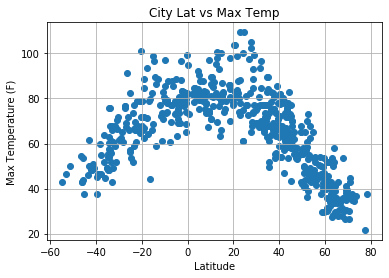

In [8]:
# Building Latitude vs Temperature Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Graph Elements 
plt.title("City Lat vs Max Temp")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

# Show plot
plt.show()

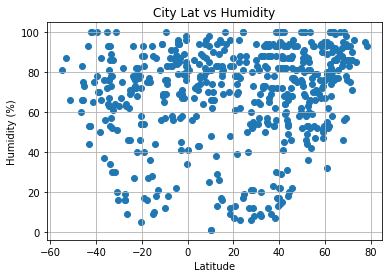

In [9]:
# Building Latitude vs Humididty Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Graph Elements 
plt.title("City Lat vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLat.png")

# Show plot
plt.show()

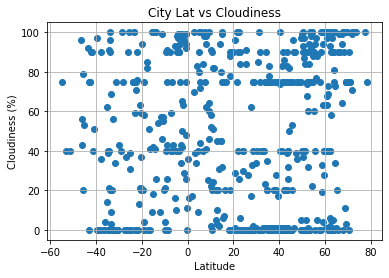

In [10]:
# Building Latitude vs Humididty Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Graph Elements 
plt.title("City Lat vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLat.png")

# Show plot
plt.show()

In [11]:
# 3 Obersrvations

# 1) Maximum Temperatures are the highest at low angles of Lattitude 
# 2) There does not seem to be a correlation between Humidity and Lattitude, however, most cities tend to have higher rather than lower amounts of humidity 
# 3) There does not see to be a correlation between Cloudiness and Lattitude. 